In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [16]:
# Fungsi untuk mengkonversi gambar RGB ke grayscale menggunakan formula standar
def rgb_to_grayscale_standard(image):
    # Pastikan gambar dalam format numpy array
    if isinstance(image, Image.Image):
        image = np.array(image)
    
    # Buat array kosong untuk citra grayscale
    height, width, _ = image.shape
    grayscale_image = np.zeros((height, width), dtype=np.uint8)
    
    # Konversi setiap piksel menggunakan formula standar
    for y in range(height):
        for x in range(width):
            r, g, b = image[y, x, 0], image[y, x, 1], image[y, x, 2]
            # Formula standar: 0.299*R + 0.587*G + 0.114*B
            gray_value = int(0.299 * r + 0.587 * g + 0.114 * b)
            grayscale_image[y, x] = gray_value
    
    return grayscale_image


In [17]:
image_path = 'onepiece.jpg'  # Ganti dengan path gambar yang ingin dikonversi
try:
    image = cv2.imread(image_path)
    # Ubah dari BGR ke RGB (OpenCV menggunakan BGR secara default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(f"Berhasil membaca gambar: {image_path}")
except Exception as e:
    print(f"Error membaca gambar: {e}")

Berhasil membaca gambar: onepiece.jpg


In [18]:
# Konversi ke grayscale menggunakan metode standard
print("Melakukan konversi ke grayscale...")
grayscale_standard = rgb_to_grayscale_standard(image)

Melakukan konversi ke grayscale...


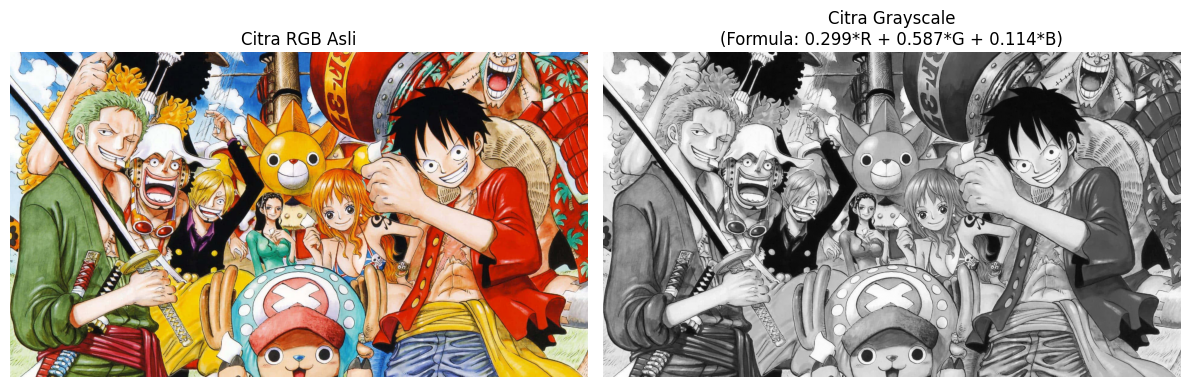

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Citra RGB Asli')
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Citra Grayscale\n(Formula: 0.299*R + 0.587*G + 0.114*B)')
plt.imshow(grayscale_standard, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

In [20]:
# Tampilkan beberapa nilai piksel untuk verifikasi formula
print("\nVerifikasi nilai piksel di beberapa titik:")
for i in range(0, 300, 100):
    for j in range(0, 300, 100):
        if i < image.shape[0] and j < image.shape[1]:
            r, g, b = image[i, j]
            gray = grayscale_standard[i, j]
            expected = int(0.299 * r + 0.587 * g + 0.114 * b)
            print(f"Posisi ({i},{j}): RGB=({r},{g},{b}) → Grayscale={gray} (Expected: {expected})")



Verifikasi nilai piksel di beberapa titik:
Posisi (0,0): RGB=(249,253,252) → Grayscale=251 (Expected: 251)
Posisi (0,100): RGB=(53,127,200) → Grayscale=113 (Expected: 113)
Posisi (0,200): RGB=(71,142,222) → Grayscale=129 (Expected: 129)
Posisi (100,0): RGB=(235,234,242) → Grayscale=235 (Expected: 235)
Posisi (100,100): RGB=(252,252,252) → Grayscale=252 (Expected: 252)
Posisi (100,200): RGB=(163,145,135) → Grayscale=149 (Expected: 149)
Posisi (200,0): RGB=(196,227,247) → Grayscale=220 (Expected: 220)
Posisi (200,100): RGB=(231,220,214) → Grayscale=222 (Expected: 222)
Posisi (200,200): RGB=(86,68,46) → Grayscale=70 (Expected: 70)


In [21]:
# Ukur waktu konversi manual
import time
start_time = time.time()
grayscale_standard = rgb_to_grayscale_standard(image)
manual_time = time.time() - start_time
print(f"\nWaktu konversi manual: {manual_time:.5f} detik")


Waktu konversi manual: 26.88437 detik
